## 1.2 Procedures and the Processes They Generate

> A procedure is a pattern for the local evolution of a computational process.It specifies how each stage of the process is built upon the previous stage. 

It is difficult to do in general, but one could see some typical patterns. 

### 1.2.1 Linear Recursion and Iteration

Good old factorial:

$$n! = n*(n-1)!$$

In [10]:
; linear recursion (stack grows linearly)
(defn factorial [n]
    (if (= n 1)
        1
        (* n (factorial (- n 1)))))
(factorial 6)

720

In [14]:
; liner iteration (tail recursion)
(defn factorial-it
  [n]
  (defn fact-iter
     [product counter max-count]
     (if (> counter max-count)
       product
       (fact-iter (* counter product) (+ counter 1) max-count)))
  (fact-iter 1 1 n))

(factorial-it 6)

720

**Note that recursive procedure and recursive process are not necessary the same thing.** 
However in Clojure, there is not tail-recursion optimization bydefault. a recursive procedure does mean a recusive process which take increasing stack space.

Exercise 1.9: Each of the following two procedures defines a method for adding two positive integers in terms of the procedures inc, which increments its argument by 1, and dec, which decrements its argument by 1.
```
; iterative
(define (+ a b)
  (if (= a 0) b (inc (+ (dec a) b))))
; recursive
(define (+ a b)
  (if (= a 0) b (+ (dec a) (inc b))))
```

### 1.2.2 Tree Recursion

Our good old Fibonacci:

In [2]:
; tree recursion
; fibonacci
(defn fib 
  [n]
  (cond (= n 0) 0
        (= n 1) 1 
        :else (+ (fib (- n 1)) 
                 (fib (- n 2)))))

(fib 6)

(defn fib-it
  "a <- a + b; b <- a"
  [n]
  (defn fib-iter 
     [a b count]
     (if (= count 0)
       b
       (fib-iter (+ a b) a (- count 1))))
  (fib-iter 1 0 n))
  
(fib-it 6)

8

Example: Counting change

How many different ways can we make change of $1.00, given half-dollars, quarters, dimes, nickels, and pennies?

total ways = way using first kind of coin + ways does not use the first kind of coin.

In [9]:
(defn first-denomination
    [kinds-of-coins]
    (cond 
        (= kinds-of-coins 1) 1
        (= kinds-of-coins 2) 5
        (= kinds-of-coins 3) 10
        (= kinds-of-coins 4) 25
        (= kinds-of-coins 5) 50))

; (first-denomination 1)
; 1
(defn cc [amount kinds-of-coins]
    (cond 
        (= amount 0) 1
        (or (< amount 0) (= kinds-of-coins 0)) 0
        :else (+ (cc amount 
                     (- kinds-of-coins 1))
                 (cc (- amount (first-denomination kinds-of-coins)) 
                     kinds-of-coins))))

(cc 100 5)

292

In [10]:
; Exercise 1.11
(defn f-rec [n]
  (cond (< n 3) n
        :else (+ (f-rec (- n 1))
                 (* 2 (f-rec (- n 2)))
                 (* 3 (f-rec (- n 3))))))

(defn f-itr [n]
  (defn iter [m f-prev f-pre-prev f-pre-pre-prev]
    (def f-this (+ f-prev (* 2 f-pre-prev) (* 3 f-pre-pre-prev)))
    (if (= m n)
      f-this
      (iter (inc m) f-this f-prev f-pre-prev)))
  (if (< n 3)
    n
    (iter 3 2 1 0)))

(f-itr 4)
(f-rec 4)

11

The pattern to convert a revursive procedure to a iterative one is to add a counter and explictly list all the internal states. The counter serves as a indicator of stop, and internal states will be update at each recursive call.

In [13]:
; Exercise 1.12 
(defn pascal [row col]
  (cond (= row 0) (if (= col 0) 1 (throw (Exception. "Out of range")))
        (= col 0)   1
        (= row col) 1
        (> row 1) (if (or (< col 0) (> col row)) 
                    (throw (Exception. "Out of range"))
                    (+ (pascal (dec row) (dec col))
                       (pascal (dec row) col)))
        :else (throw (Exception. "Out of range"))))

(for [row (range 0 10)
      col (range 0 (inc row))]
  (pascal row col))

(1 1 1 1 2 1 1 3 3 1 1 4 6 4 1 1 5 10 10 5 1 1 6 15 20 15 6 1 1 7 21 35 35 21 7 1 1 8 28 56 70 56 28 8 1 1 9 36 84 126 126 84 36 9 1)

### 1.2.3 Orders of Growth

Previously, we notice that processes can differ considerably in the rates at which they consume computational resources. Order of growth is used to measure of the resources required by a process as the input become larger. Here resource maily means the operations of CPU or the memory used.

Let $n$ be a parameter that measures the size of the problem, and let $R(n)$ be the amount of resources the process requires for a problem of size $n$.

We say that $R(n)$ has order of growth $\Theta(f(n))$, meaning $R(n)=\Theta(f(n))$, if there are positive constants $k_1$ and $k_2$ independent of n such that $k_1f(n) <= R(n) <= k_2f(n)$ for any large value of n.

For example, leaner recursive process for computing facorial grows as $\Theta(n)$ in space and memory space. While the iterative process grows as $\Theta(n)$ but $\Theta(1)$.


**Exercise 1.14**

> Exercise 1.14: Draw the tree illustrating the process generated by the count-change procedure of Section 1.2.2 in making change for 11 cents. What are the orders of growth of the space and number of steps used by this process as the amount to be changed increases?

Recall here is the code to solve the problem:

```clojure
(defn first-denomination
    [kinds-of-coins]
    (cond 
        (= kinds-of-coins 1) 1
        (= kinds-of-coins 2) 5
        (= kinds-of-coins 3) 10
        (= kinds-of-coins 4) 25
        (= kinds-of-coins 5) 50))

; (first-denomination 1)
; 1
(defn cc [amount kinds-of-coins]
    (cond 
        (= amount 0) 1
        (or (< amount 0) (= kinds-of-coins 0)) 0
        :else (+ (cc amount 
                     (- kinds-of-coins 1))
                 (cc (- amount (first-denomination kinds-of-coins)) 
                     kinds-of-coins))))
```

Start with space. The space consumed by `cc` is proportional to the max height of the calling tree. So order of growth for space will be $\Theta(n)$.

Time is more interesting. Let's start with simple case: `c(n, 1)`, which means we only have 1 kind of coins. We see that the tree just keep grow in 1 path to n level and get the result of 1. Then we know the operations needed for $C(n,1)$:

$$ T\left(n,1\right) = 2n + 1 = \Theta \left(n\right) $$


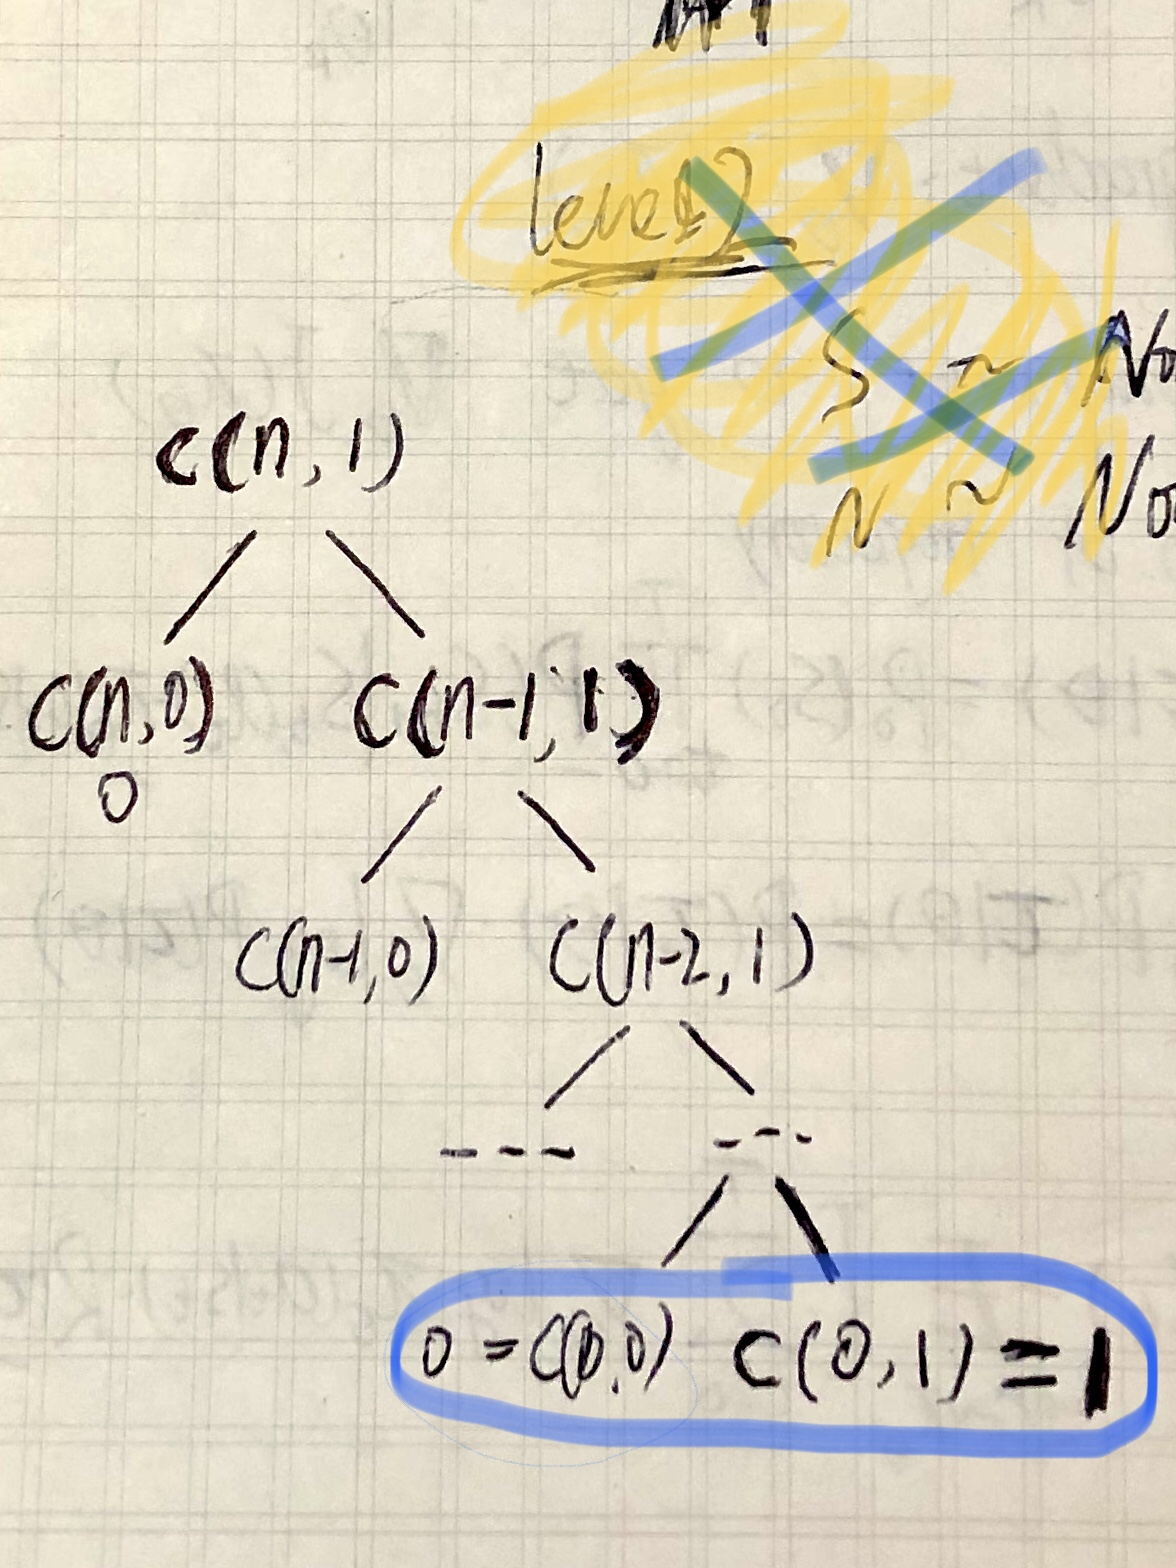

Then let's see two kinds of coin cases: $C(n, 2)$. ${C}_{2} = 5$ and ${C}_{1} = 1$. Note that blue circle we already know the answer, and this tree will terminate at $n/5$. So at each level we have $T(n, 1) + 1$. So we have:

$$ T\left(n,2\right) = \lfloor {\frac {n} {5} } \rfloor \left( T\left(n,1\right) + 1\right) + 2 = \lfloor {\frac {n} {5} } \rfloor \left( 2n + 2 \right) + 2 = \Theta\left(n^2\right) $$

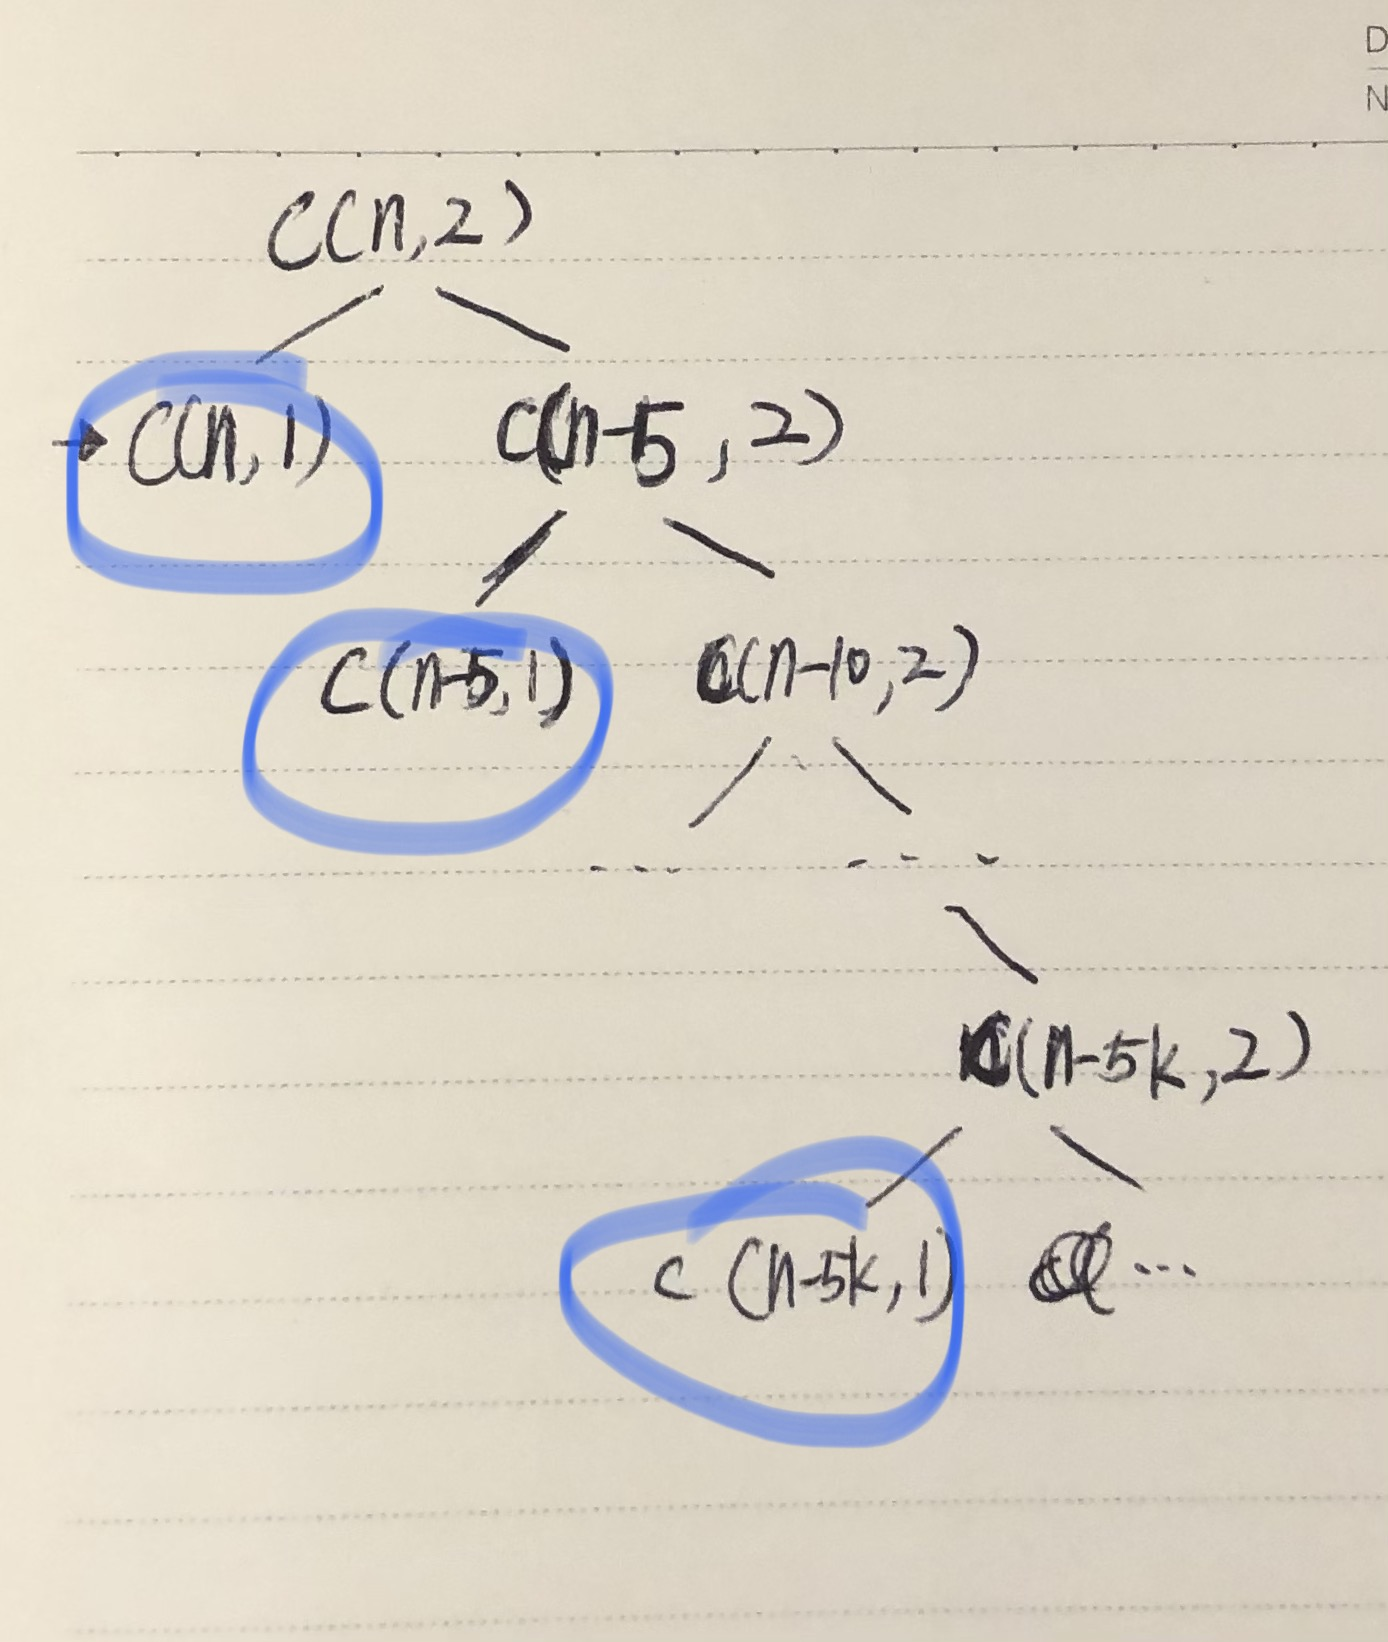

And if we keep doing with $C(n, 3)$ we find following: 

$$ T\left(n,3\right) = \lfloor {\frac {n} {10} } \rfloor \left( T\left(n,2\right) + 1 \right) + 2 = \lfloor {\frac {n} {10} } \rfloor \times \Theta\left(n^2\right) + 2 = \Theta\left(n^3\right) $$

So in conclusion, the time cost would be related to the kind of coins, $m$:

$$T(n, m) = \Theta(n^m)$$

**Exercise 1.15**

```clojure
(defn cube [x] (* x x x))
(defn abs [x] 
    (if (< x 0) (- x) x))
(defn p [x] (- (* 3 x) (* 4 (cube x))))
(defn sine [angle]
    (if (not (> (abs angle) 0.1))
        angle
        (p (sine (/ angle 3.0)))))
```

> - How many times is the procedure p applied when(sine 12.15) is evaluated?
> - Time and space complexity of sine?

We p is called 5 ($12.15/3^x=0.1$) times. More general, give `sine a`, we call `p` $roundup(\frac{log{10a}}{log3})$ times. So the space complexity is $\Theta(log(a))$ and time is the same order. 

In [1]:
(defn cube [x] (* x x x))
(defn abs [x] 
    (if (< x 0) (- x) x))
(defn p [x] (- (* 3 x) (* 4 (cube x))))
(defn sine [angle]
    (if (not (> (abs angle) 0.1))
        angle
        (p (sine (/ angle 3.0)))))

#'user/sine

### 1.2.4 Exponentiation 

Computing of exponentiation can be defined as:

$$b^n = b \times b^{n-1},\
b^0 = 1$$

Then we can come up with a simple procedure:

In [2]:
(defn expt [b n]
    (if (= n 0) 
        1
        (* b (expt b (- n 1)))))

(println (expt 2 3))

8


Which is a linear recusive procedure that requires $\Theta(n)$ steps and space. We could also have the iterative version: (and recall the trick is the flatten all the internal states and a counter to indicate termination of the loop.)

In [3]:
(defn expt-iter [b n]
    (defn expt-helper [b cnt cur]
        (if (= cnt 0)
            cur
            (expt-helper b
                         (- cnt 1)
                         (* b cur))))
    (expt-helper b n 1))

(println (expt-iter 2 3))

8


We could also come with another definition:

$$b^n = (b^{n/2})^2, \text{if n is even}, \\ b^n=b \times b^{n-1}, \text{if n is odd} $$

And this one has $\Theta(log(n))$ .

In [1]:
(defn square [n] (* n n))
(defn fast-expt [b n]
    (cond (= n 0) 1
        (even? n) (square (fast-expt b (/ n 2)))
        :else (* b (fast-expt b (- n 1)))))

#'user/fast-expt

**Exercise 1.16**

Design a iterative version of above procedure.In general, the technique of defining an invariant quantity that remains unchanged from state to state is a powerful way to think about the design of iterative algorithms. If you check the formula above, $b^{n-1}$ is the internal state, which is represented by `a` in the code.

In [2]:
(defn fast-expt-iter [b n]
    (defn helper [b n a]
        (cond (= n 0) a
            (even? n) (helper (square b) (/ n 2) a)
            (odd? n) (helper b (dec n) (* a b))))
    (helper b n 1))

(fast-expt-iter 2 3)

8

**Exercise 1.17**

Now suppose we include, together with addition, operations double, which doubles an integer, and halve, which divides an (even) integer by 2. Using these, **design a multiplication procedure analogous to fast-expt that uses a logarithmic number of steps.**

The definition could be: $a \times b = a + a \times (b-1)$

In [3]:
(defn halve [n] (when (even? n) (/ n 2)))
(defn double [n] (* n 2))

(defn mul-slow [a b]
    (if (= b 0) 
        0
        (+ a (mul-slow a (- b 1)))))

(defn fast-mult-rec [a b]
  (cond (= b 1) a
        (= a 1) b
        (even? b) (double (fast-mult-rec a (halve b)))
        :else (+ a (fast-mult-rec a (dec b)))))

#'user/fast-mult-rec

**Exercise 1.18**

```clojure
; tail recursion .. 
(defn mul-fast [a b]
    (defn helper [a b prod]
        (cond (= b 0) prod ;; add a for b times
            (even? b) (helper (double a) (halve b) prod)
            :else (helper a (- b 1) (+ a prod))))
    (helper a b 0))

(mul-fast 2 2)
```

**Exercise 1.19**

A $\Theta(log(n))$ Fibonacci.

In [4]:
(defn fib-iter [a b p q count]
    (cond (= count 0) b
        (even? count) 
        (fib-iter a 
                  b
                  (+ (* p p) (* q q))
                  (+ (* q q) (* 2 p q))
                  (/ count 2))
        :else (fib-iter (+ (* b q) (* a q) (* a p))
                        (+ (* b p) (* a q))
                        p
                        q
                        (- count 1))))
(defn fib-n [n]
    (fib-iter 1 0 0 1 n))

(fib-n 10)

55

### 1.2.5 Greatest Common Divisor

$GCD(a, b) = GCD(b, r)$, where $r$ is the remainder when a is divided by b.

In [5]:
(defn rem' [a b]
    (println "call REM")
    (rem a b))

(defn gcd [a b]
    (if (= b 0) 
        a
        (gcd b (rem' a b))))

(gcd 206 40)

call REM
call REM
call REM
call REM


2

**Exercise 1.20**

For $GCD(206, 40)$, using above precedure, how many time `rem` procedure will be called in normal-order evaluation and applicative-order evaluation?

By add a printing rem function, we know that in clojure, it is called 4 time and clojure is applicative order evaulation. What about normal order?

```
(gcd 206 40)
(gcd 40 (REM 206 40))
(gcd 6' (REM 40 6))
(gcd 4' (REM 6' 4'))
(gcd 2' (REM 4' 2'))
(gcd 0' 2')
```

Where, n' means an expression not a value. We need to evaluate n', and we also need to evaluatie REM in the if statements. So in total, we count 18 times.

### 1.2.6 Example: Testing for Primality

This section describes two methods for checking the primality of an integer $n$, one with $\Theta(\sqrt n)$, one with $\Theta(log(n))$. 

**Searching for divisors**
The end test for find-divisor is based on the fact that if n is not prime it $n$
must have a divisor less than or equal to $\sqrt n$

In [6]:
(defn square [a] (* a a))
(defn divides? [a b] (= (rem b a) 0))
(defn find-divisor [n test-divisor]
    (cond (> (square test-divisor) n) n
        (divides? test-divisor n) test-divisor
        :else (find-divisor n (+ test-divisor 1))))
(defn smallest-divisor [n] (find-divisor n 2))
(defn prime? [n]
    (= n (smallest-divisor n)))

(prime? 4)

false

**The Fermat test**

> This algo has a different random property.
If n is a prime number and a is any positive integer less than n, then a raised to the nth power is congruent to a modulo n.

In [7]:
(defn square [n] (* n n))
(defn expmod [base exp m]
  "base^exp mod m"
  (cond (= exp 0) 1
        (even? exp) (mod (square (expmod base (/ exp 2) m))
                         m)
        :else (mod (* base (expmod base (dec exp) m))
                   m)))

(defn fermat-test [n]
    (defn try-it [a]
        (= (expmod a n n) a))
    (try-it (+ 1 (rand (- n 1)))))

(defn fast-prime? [n times]
    (cond (= times 0) true
        (fermat-test n) (fast-prime? n (- times 1))
        :else false))

(fast-prime? 19999 1)

false

**Exercise 1.21**

In [8]:
(smallest-divisor 199)

199

In [9]:
(smallest-divisor 1999)

1999

In [10]:
(smallest-divisor 19999)

7

**Exercise 1.22**

In [11]:
(def display println)

(defn runtime [] (inst-ms (java.time.Instant/now)))

(defn report-prime [elapsed-time]
    (display " *** ")
    (display elapsed-time))

(defn start-prime-test [n start-time]
    (if (prime? n)
        (report-prime (- (runtime) start-time))))

(defn timed-prime-test [n]
    (newline)
    (display n)
    (start-prime-test n (runtime)))

(defn search-for-primes [from to]
  (def start (runtime))
  (let [table (map #(vector % (fast-prime? % 20)) (range from to))]
    (map first (filter second table)))
  (report-prime (- (runtime) start)))

(defn timed-primer-search [n m]
    (newline)
    (display n m)
    (search-for-primes n m))

#'user/timed-primer-search

In [12]:
(timed-prime-test 199999)
(timed-primer-search 10 20)


199999
 *** 
1

10 20
 *** 
0


**Exercise 1.23**

Make `smallest-divisor` better.

**Exercise 1.24**

**Exercise 1.25**

It will work.